# Deployment Script

- loads actor and critic from file
- prepares command to send
- maps sensordata to actor

In [1]:
import time
from deployment import *
from tqdm import tqdm

Job will run on cpu


In [2]:
# load actor and critic from file
agent = DDPG(state_dim=3, action_dim=1)
agent.load() # in same folder as this script
print(agent)

learning rates: actor 0.0 | critic 0.0


In [6]:
# test RX
print(RX("< 74282: 9.73: 1.21: 1980: 0: 0 >"))
print(TX(4.5,42069))
len("< 74282: 9.73: 1.21: 1980: 0: 0 >")

(1.21, 9.73, 3.3846153846153846)
< 42069: 4.5>


33

In [ ]:
# control loop

logs = np.zeros(1_000_000) # takes ~3 min to complete
x_target = 2

for i in tqdm(range(1_000_000)):
    
    start_time = time.time()
    
    x, a, _ = RX("< 74282: 9.73: 1.21: 1980: 0: 0 >")
    state = np.array([x_target,x,a])
    action = agent.select_action(state) # range ? [-1..1] (?)
    action = map(action, -1, 1, 0, 7) # [0..7]

    end_time = time.time()
    measurement = end_time - start_time
    logs[i] = measurement

logs = np.array(logs)
print(f'min: {np.min(logs)*1000:0.2f} ms, max: {np.max(logs)*1000:0.2f} ms, mean: {np.mean(logs)*1000:0.2f} ms, median: {np.median(logs)*1000:0.2f} ms')

 85%|████████████████████████████████████████████████████████████           | 846116/1000000 [02:38<00:28, 5428.20it/s]

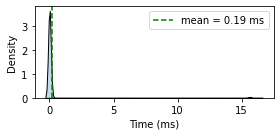

In [59]:
import seaborn as sns

plt.figure(figsize=(4, 2))
# Create a density plot

plt.axvline(x=np.mean(logs)*1000, color='green', linestyle='--', label=f'mean = {np.mean(logs)*1000:0.2f} ms') # mean
sns.kdeplot(logs * 1000, fill=True, edgecolor='black')

# Set plot labels and title
#plt.title('Execution Time Density Plot')
plt.xlabel('Time (ms)')
plt.ylabel('Density')
plt.legend()
#plt.ylim(-0.1,4)

plt.tight_layout()
plt.savefig('img/ex_time.pdf', bbox_inches='tight')
plt.show()